In [1]:
from Trading import *
import tensorflow as tf 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import gridspec
from copy import deepcopy
import seaborn as sns
from sklearn.metrics import confusion_matrix 
sns.set() 

D:\ANACONDA\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
stock_list =  ['0050', '2330', '2317', '6505', '2412', '1301', '1326', '2882', '1303', '2881']
x_train, y_train = make_data(stock_list, date = '2013-01-01', end_date = '2019-06-15', SOTE = True)
x_validation, y_validation = make_data(stock_list, date = '2019-06-16', end_date = '2020-06-16', SOTE = True)

In [5]:
# 讀取模型
model = tf.keras.models.load_model('stock_model.h5')

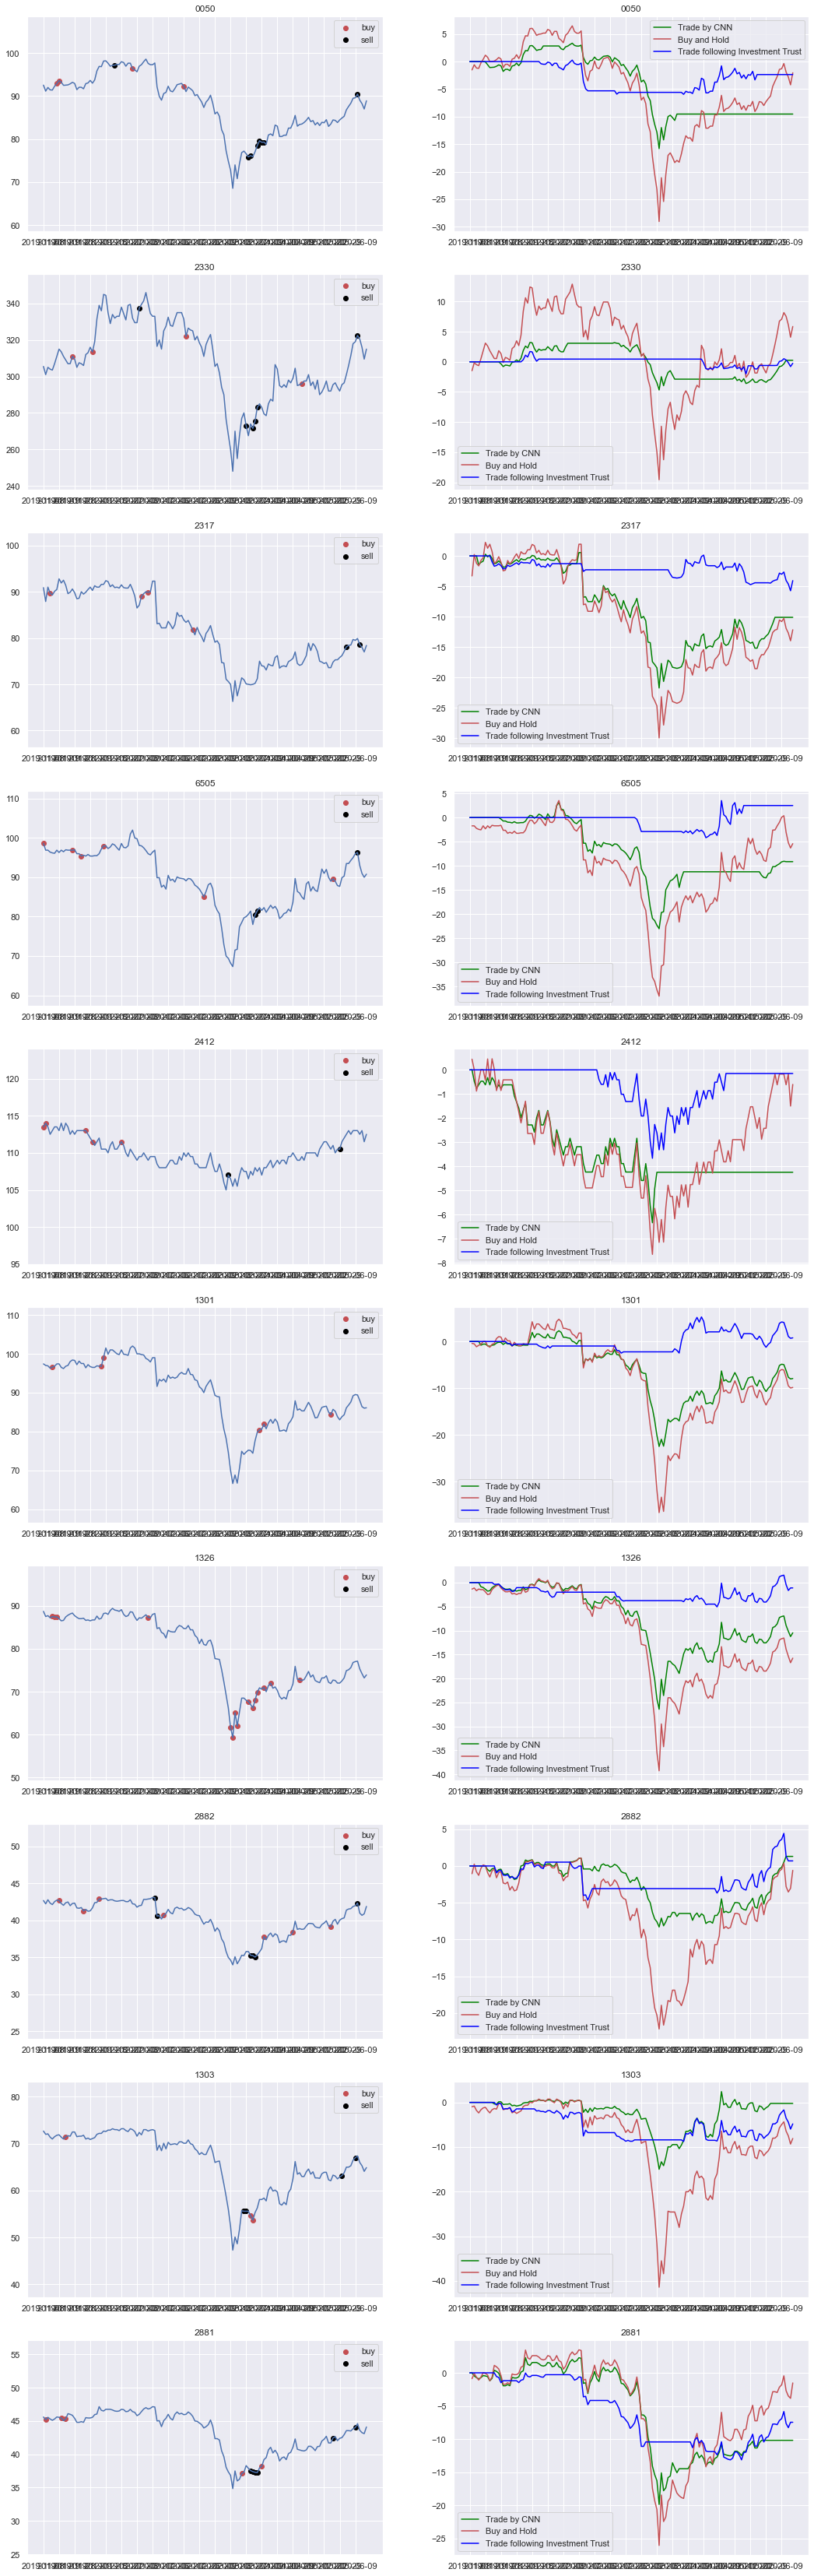

In [12]:
# 畫出挑選的股對應的每個交易策略的報酬率走勢圖
stock_list = ['0050', '2330', '2317', '6505', '2412', '1301', '1326', '2882', '1303', '2881']
fig = plt.figure(figsize=(18, 60))
for i in range(len(stock_list)):
    for j in range(1, 3):
        gs = gridspec.GridSpec(10, 2, width_ratios=[1, 1])
        ax = plt.subplot(gs[i*2 + j - 1])
        x_test, y_test = preprocessing(stock_list[i], date = '2019-06-16', end_date = '2020-06-16')
        result = model.predict_classes(x_test)
        stock = Trade(stock_list[i], date = '2019-11-08', end_date = '2020-06-16', buy_flag=(result == 0), sell_flag=(result == 2))
        df = stock.trading()
        if j == 1:
            buy_df = deepcopy(df)
            sell_df = deepcopy(df)
            plt.ylim(df["close"].min()-10, df["close"].max()+10)
            buy_df.loc[df.buy_flag == False , 'close'] = 0
            sell_df.loc[df.sell_flag == False, 'close'] = 0
            ax.plot(df["close"])
            ax.scatter(buy_df.index, buy_df['close'], c = 'r', label = "buy")
            ax.scatter(sell_df.index, sell_df['close'], c = 'black', label = "sell")
        else:
            ax.plot(df['return'], c = 'green', label = 'Trade by CNN')
            df = df.drop(df[df['close'] == 0].index)
            df['BaHr_return'] = df['close'].pct_change()
            df['BaHr_cum_return'] = df['BaHr_return'].cumsum()*100
            ax.plot(df['BaHr_cum_return'], c = 'r', label = 'Buy and Hold')
            
            stock2 = Trade(stock_list[i], date = '2019-11-08', end_date = '2020-06-16')
            stock2.follow_IT()
            df = stock2.trading()
            ax.plot(df.index, df['return'], c = 'blue', label = "Trade following Investment Trust")
        new_ticks = []
        for k in range(len(df.index)):
            denominator = int(len(df.index) / 20)
            new_ticks.append(df.index[k]) if k%denominator == 0 else 0
        plt.xticks(new_ticks)
        plt.title(stock.stock_id)
        plt.legend()


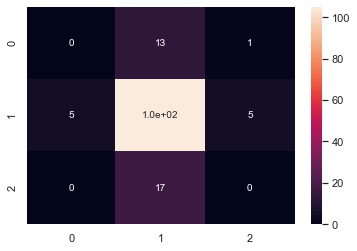

In [18]:
stock = Trade(stock_list[i], date = '2019-11-08', end_date = '2020-06-16', buy_flag=(result == 0), sell_flag=(result == 2))
df = stock.max_min_price()
original_y_test = df['flag']
C2= confusion_matrix(original_y_test , result, labels=[0, 1, 2]) 
sns.heatmap(C2,annot=True)